In [162]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import codecs
import json
import itertools
import operator

In [141]:
#Loading to a dictonary and creating a directed graph
with codecs.open("./data_final.txt", 'r', "utf-8") as f:
        artist_data = json.load(f)

In [142]:
G = nx.DiGraph()

In [143]:
exceptions = []
for artist in artist_data:
    G.add_node(artist)
    try:     
        for featured_artist in artist_data[artist][2]:
            if featured_artist in artist_data:
                G.add_edge(artist, featured_artist)
    except:
        exceptions.append(artist)

In [145]:
#Calculating different statistics
indegree_distribution      = sorted((d for n, d in G.in_degree()), reverse=True)
outdegree_distribution     = sorted((d for n, d in G.out_degree()), reverse=True)
#undirectional_distribution = sorted((d for n, d in G_undirectional.degree()), reverse=True)
indegree_mean              = np.mean(indegree_distribution)
outdegree_mean             = np.mean(outdegree_distribution)
indegree_median            = np.median(indegree_distribution)
outdegree_median           = np.median(outdegree_distribution)
indegree_mode              = max(set(indegree_distribution), key=indegree_distribution.count)
outdegree_mode             = max(set(outdegree_distribution), key=outdegree_distribution.count)
indegree_min               = min(indegree_distribution)
outdegree_min              = min(outdegree_distribution)
indegree_max               = max(indegree_distribution)
outdegree_max              = max(outdegree_distribution)

In [146]:
print('Outdegree:', f'mean={outdegree_mean},', f'minimum={outdegree_min},', f'max={outdegree_max},', f'mode={outdegree_mode}')
print('Indegree:', f'mean={indegree_mean},', f'minimum={indegree_min},', f'max={indegree_max},', f'mode={indegree_mode}')

Outdegree: mean=30.331654676258992, minimum=0, max=219, mode=0
Indegree: mean=30.331654676258992, minimum=0, max=523, mode=1


In [147]:
indegree_dist = dict([(degree[0], len(list(degree[1]))) for degree in itertools.groupby(indegree_distribution)])
outdegree_dist = dict([(degree[0], len(list(degree[1]))) for degree in itertools.groupby(outdegree_distribution)])

In [148]:
def plot_degrees(x, y, title, xaxis, yaxis='Frequency (Count)', figsize=(10, 7)):    
    plt.figure(figsize=figsize)
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.show()

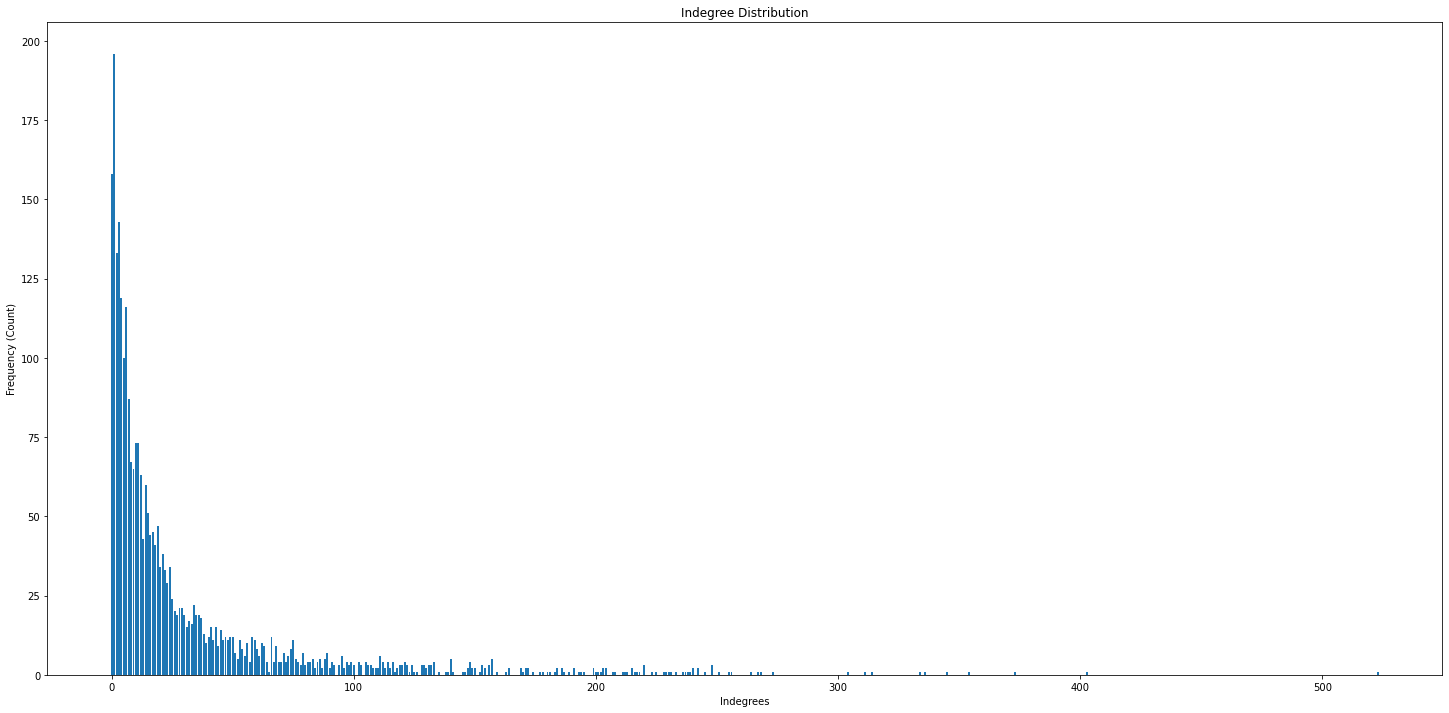

In [149]:
plot_degrees(indegree_dist.keys(), indegree_dist.values(), title='Indegree Distribution', xaxis='Indegrees', figsize=(25, 12))

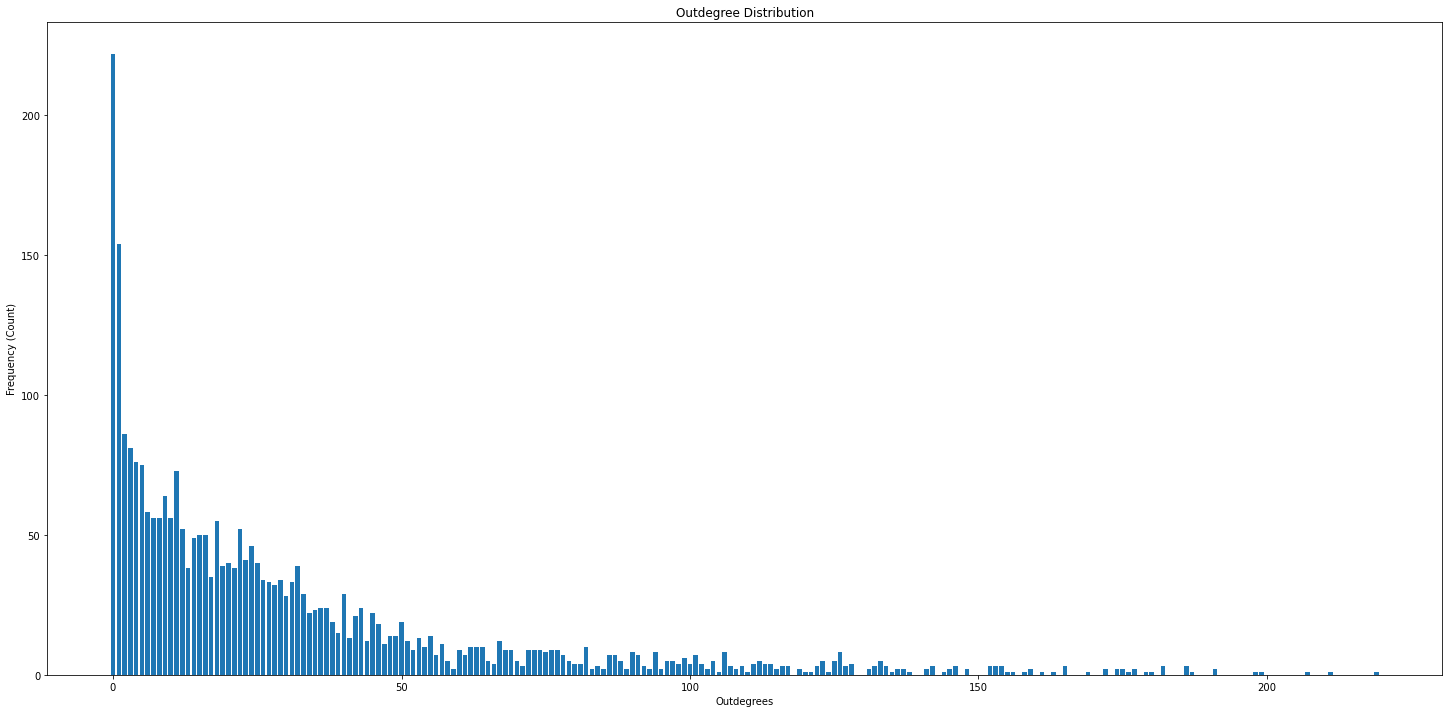

In [150]:
plot_degrees(outdegree_dist.keys(), outdegree_dist.values(), title='Outdegree Distribution', xaxis='Outdegrees', figsize=(25, 12))

In [151]:
print(sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:10])
print(sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:10])


[('snoop dogg', 523), ('lil wayne', 403), ('gucci mane', 373), ('wiz khalifa', 354), ('rick ross', 345), ('busta rhymes', 336), ('2 chainz', 334), ('lil baby', 314), ('future', 311), ('e-40', 304)]
[("lil' cease", 219), ('mos def', 211), ('sheck wes', 207), ('treach', 199), ('rah digga', 198), ('memphis bleek', 191), ('i-20', 191), ('playboi carti', 187), ('inspectah deck', 186), ('slick rick', 186)]


We can see that Snoop Dogg has the highest centrality in terms of indegrees while lil cease seems to be the topper for the out degrees. We will now check some of the other centrality measures to see if they yield other ineresting results.
To give a quick comment on the degree distribution - a quick look at Snoop Dogg shows that he is one of the all time greats and have been in the Hip Hop industry since the very beggining. It therefore makes sense that he is one of the most featured artists since he has been in the game the longest. 

In [160]:
#Betweness Centrality
betweness_centrality = nx.betweenness_centrality(G)

In [169]:
betweness_centrality
max_betweness_centrality = max(betweness_centrality.items(), key=operator.itemgetter(1))[0]
print(max_betweness_centrality, betweness_centrality[max_betweness_centrality])

snoop dogg 0.0202858941299738


We can see that snoopdogg is the artist with the highest measure of betweness centrality. This means 

In [173]:
closeness_centrality = nx.closeness_centrality(G)
max_closeness_centrality = max(closeness_centrality.items(), key=operator.itemgetter(1))[0]
print(max_closeness_centrality, closeness_centrality[max_closeness_centrality])

snoop dogg 0.44529846732870676


We can see that Snoop Dogg is again the hip hop artist with the highest closeness centrality. This means that Snoop Dogg is closest 

In [183]:
outdegree_dist[0]

222